<a href="https://colab.research.google.com/github/YashSharma07/CSGO-Winner-Prediction/blob/main/KNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
dif = pd.read_csv('https://raw.githubusercontent.com/insignificantGuy/Kaggle-Datasets/main/csgo_round_snapshots.csv')
dif.isna().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [ ]:
df = pd.get_dummies(dif,drop_first=True)
df

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,...,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo,round_winner_T
0,175.00,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0
1,156.03,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0
2,96.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0
3,76.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0
4,174.97,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,True,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1
122406,174.93,11.0,15.0,False,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1
122407,114.93,11.0,15.0,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0,0.0,2.0,0.0,0.0,

In [ ]:
dif

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr = scaler.fit_transform(df.drop('round_winner_T',axis=1))
dif = pd.DataFrame(arr,columns=df.columns[:-1])

In [ ]:
dif.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,...,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,1.415828,-1.400576,-1.405702,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,-0.595345,-1.115364,-1.379297,-1.004951,0.602448,0.597412,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.67383,0.0,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,0.0,-0.021331,-0.098501,-0.271725,-0.079592,1.039382,-0.002858,0.0,-0.242763,-0.051389,-0.882806,...,-0.002858,-0.431618,-0.723924,-0.224726,-0.139955,-0.201795,-0.172652,-0.085777,-0.01617,-0.528063,-0.467479,-0.214046,-0.093784,0.516902,-0.278862,-0.44395,-0.503436,1.942778,-0.065959,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,2.127888,-0.49142,-0.422967,-0.428977,-0.360532,-0.351941,-0.316366
1,1.067531,-1.400576,-1.405702,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,-0.870776,-1.115364,-1.379297,-0.382199,0.602448,0.597412,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.67383,0.0,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,0.0,-0.021331,-0.098501,-0.271725,-0.079592,1.039382,-0.002858,0.0,-0.242763,-0.051389,-0.882806,...,-0.002858,-0.431618,-0.723924,-0.224726,-0.139955,-0.201795,-0.172652,-0.085777,-0.01617,-0.528063,-0.467479,-0.214046,-0.093784,0.516902,-0.278862,-0.44395,-0.503436,1.942778,-0.065959,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,2.127888,-0.49142,-0.422967,-0.428977,-0.360532,-0.351941,-0.316366
2,-0.034094,-1.400576,-1.405702,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,-0.883109,-1.115364,-1.379297,-0.382199,-0.227087,-0.216709,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.67383,0.0,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,0.0,-0.021331,-0.098501,-0.271725,-0.079592,0.424292,-0.002858,0.0,-0.242763,-0.051389,-0.882806,...,-0.002858,-0.431618,-0.723924,-0.224726,-0.139955,-0.201795,-0.172652,-0.085777,-0.01617,-0.528063,-0.467479,-0.214046,-0.093784,0.516902,-0.278862,-0.44395,-0.503436,-0.409385,-0.065959,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,2.127888,-0.49142,-0.422967,-0.428977,-0.360532,-0.351941,-0.316366
3,-0.401302,-1.400576,-1.405702,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,-0.883109,-1.115364,-1.379297,-0.382199,-0.227087,-0.216709,-0.470136,-0.912049,-0.292446,-0.083519,-0.852132,-0.67383,0.0,-0.009039,-0.340853,-0.279094,-0.063461,-0.042141,-0.283147,-0.066942,0.0,-0.021331,-0.098501,-0.271725,-0.079592,-0.190798,-0.002858,0.0,-0.242763,-0.051389,-0.882806,...,-0.002858,-0.431618,

In [ ]:
x_all = dif
y_all = df['round_winner_T']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predict = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test,predict)
matrix

array([[10783,  1291],
       [ 1252, 11156]])

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     12074
           1       0.90      0.90      0.90     12408

    accuracy                           0.90     24482
   macro avg       0.90      0.90      0.90     24482
weighted avg       0.90      0.90      0.90     24482



In [ ]:
error_rate = []
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params_rate = {'n_neighbors':range(1,15)}
grid = RandomizedSearchCV(knn,params_rate,cv=10,scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1),
                   param_distributions={'n_neighbors': range(1, 15)},
                   scoring='accuracy', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.8884180278914044


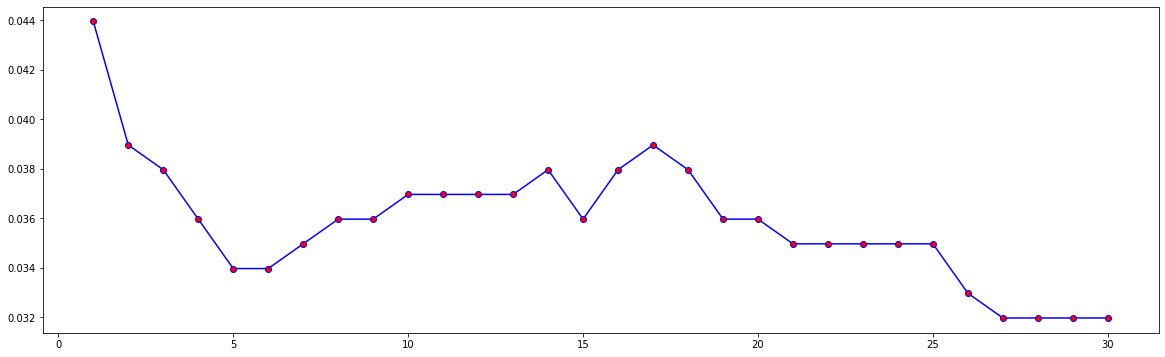

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(range(1,31),error_rate,c='b',marker='o',markerfacecolor='r')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)
score = knn.predict(x_test)
matrix = confusion_matrix(y_test,score)
print(matrix)
print(classification_report(y_test,score))

[[491  13]
 [ 19 478]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       504
           1       0.97      0.96      0.97       497

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
score = knn.predict(x_test)
matrix = confusion_matrix(y_test,score)
print(matrix)
print(classification_report(y_test,score))

[[828  22]
 [ 30 771]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       850
           1       0.97      0.96      0.97       801

    accuracy                           0.97      1651
   macro avg       0.97      0.97      0.97      1651
weighted avg       0.97      0.97      0.97      1651

